# Fitting maximum entropy models - kangaroos example

## Example use of the maximum entropy module:

Gull and Skilling (1984) gave the following example, which they describe as a physicist's perversion of the formal mathemetical analysis of Shore and Johnson 1980 showing that maximizing the entropy function is required for logical consistency.

Information:

    (1)    A third of all kangaroos are blue-eyed
    (2)    A quarter of all kangaroos are left-handed

On the basis of this information alone, what proportion $x$ of kangaroos are both blue-eyed and left-handed?

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<table>
<tr><th></th><th>left-handed</th><th>right-handed</th><th>$\sum$</th></tr>
<tr><td>blue-eyed</td><td>$x$</td><td>?</td><td>$\frac{1}{3}$</td></tr>
<tr><td>green-eyed</td><td>?</td><td>?</td></tr>
<tr><td>$\sum$</td><td>$\frac{1}{4}$</td><td></td><td>1</td></tr>
</table>

The normalization conditions imply that we have:

<table>
<tr><th></th><th>left-handed</th><th>right-handed</th><th>$\sum$</th></tr>
<tr><td>blue-eyed</td><td>$0 \leq x \leq \frac{1}{4}$</td><td>$\frac{1}{3} - x$</td><td>$\frac{1}{3}$</td></tr>
<tr><td>green-eyed</td><td>$\frac{1}{4} - x$</td><td>$\frac{5}{12} + x$</td><td>$\frac{2}{3}$</td></tr>
<tr><td>$\sum$</td><td>$\frac{1}{4}$</td><td>$\frac{3}{4}$</td><td>1</td></tr>
</table>

parameterized in terms of $x$.

### Are handedness and eye colour independent?

Most people would intuitively guess that $x = \frac{1}{4} \times \frac{1}{3} = \frac{1}{12}$. Why?

Any other value than $x = 1 / 12$ would indicate that knowing the kangaroo's eye-colour tells us something about its handedness. But we have no information that there is a link, or in which direction any such link might be. So our intuition is that the most reasonable assignment assumes no link.

Intuitively, this is the least informative choice, the flattest subject to the information we know. It is actually the choice that **maximizes entropy** of the probability distribution. Below we show this numerically.

### Entropy

The "information entropy" $H(p)$ of a probability distribution $p$ is a measure of its disorder or flatness. For a discrete distribution $p$ it is defined as:
$$
H(p) = -\sum p_i \log(p_i)
$$

whenever $p_i > 0$.

In [2]:
from scipy.stats import entropy

What properties does it have?

#### Example: a deterministic die (with no randomness)

Suppose a die is rigged so it **always** comes up 1. Then it has this probability distribution:

<table>
<tr><th>$i$</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>$\sum p_i$</th></tr>
<tr><td>$p_i$</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
</table>

Its entropy is **zero**.

In [3]:
p_rigged = np.zeros(6)
p_rigged[0] = 1
entropy(p_rigged)

0.0

#### Example: fair die

<table>
<tr><th>$i$</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>$\sum p_i$</th></tr>
<tr><td>$p_i$</td><th>$\frac{1}{6}$</th><th>$\frac{1}{6}$</th><th>$\frac{1}{6}$</th><th>$\frac{1}{6}$</th><th>$\frac{1}{6}$</th><th>$\frac{1}{6}$</th><td>1</td></tr>
</table>

In [4]:
p_fair = np.ones(6) / 6
entropy(p_fair)

1.791759469228055

#### Example: unfair die

In [5]:
p_unfair = np.ones(6)
# Assign arbitrary values:
p_unfair[0] = 5
p_unfair[5] = 4
p_unfair /= p_unfair.sum()   # normalize
print(p_unfair)

[ 0.38461538  0.07692308  0.07692308  0.07692308  0.07692308  0.30769231]


In [6]:
entropy(p_unfair)

1.5193826646423012

### Exercise: show that the fair die probability distribution has higher entropy than any other distribution (for any unfair die)

Brute-force approach: try calculating entropies for each of, say, 1 million different assignments of $p_1,\dots,p_6$ (normalized to sum to 1).

In [7]:
ps = np.random.uniform(size=(10**6, 6))

In [8]:
entropies = entropy(ps.T)
entropies

array([ 1.68725081,  1.7336915 ,  1.55416903, ...,  1.72126369,
        1.75162778,  1.64898487])

In [9]:
np.all(entropies < entropy(p_fair))

True

### Back to kangaroos

Recall this table of probabilities:

<table>
<tr><th></th><th>left-handed</th><th>right-handed</th><th>$\sum$</th></tr>
<tr><td>blue-eyed</td><td>$0 \leq x \leq \frac{1}{4}$</td><td>$\frac{1}{3} - x$</td><td>$\frac{1}{3}$</td></tr>
<tr><td>green-eyed</td><td>$\frac{1}{4} - x$</td><td>$\frac{5}{12} + x$</td><td>$\frac{2}{3}$</td></tr>
<tr><td>$\sum$</td><td>$\frac{1}{4}$</td><td>$\frac{3}{4}$</td><td>1</td></tr>
</table>

Here is a function that returns the matrix of probabilities for a given $x$ value:

In [11]:
def kangaroo_prob_matrix(x):
    assert 0 <= x <= 0.25
    p = np.zeros((2, 2))
    p[0, 0] = x
    p[0, 1] = 1/3 - x
    p[1, 0] = 1/4 - x
    p[1, 1] = 5/12 + x
    return p

In [12]:
kangaroo_prob_matrix(0.2)

array([[ 0.2       ,  0.13333333],
       [ 0.05      ,  0.61666667]])

In [15]:
params = np.linspace(0, 0.25, num=100)
entropies = [entropy(kangaroo_prob_matrix(x).flatten()) for x in params]

We can determine the entropy-maximizing parameter $x$ empirically as:

In [16]:
x_opt = params[np.argmax(entropies)]
x_opt

0.083333333333333343

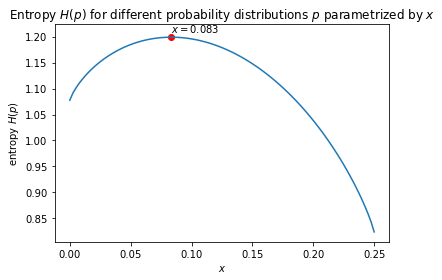

In [17]:
plt.plot(params, entropies)
plt.xlabel('$x$')
plt.ylabel('entropy $H(p)$')
plt.scatter(x_opt, np.max(entropies), color='red')
plt.text(x_opt, np.max(entropies)+0.01, f'$x={x_opt:.3f}$',withdash=True)
plt.title('Entropy $H(p)$ for different probability distributions $p$ parametrized by $x$');

### Solution with maxentropy package

In [18]:
from itertools import product

samplespace = list(product(['left-handed', 'right-handed'], ['blue-eyed', 'green-eyed']))

In [19]:
samplespace

[('left-handed', 'blue-eyed'),
 ('left-handed', 'green-eyed'),
 ('right-handed', 'blue-eyed'),
 ('right-handed', 'green-eyed')]

In [20]:
def f0(x):
    return x in samplespace

def f1(x):
    return x[1] == 'blue-eyed'

def f2(x):
    return x[0] == 'left-handed'

f = [f0, f1, f2]

In [23]:
from maxentropy.skmaxent import MinDivergenceModel
model = MinDivergenceModel(f, samplespace, vectorized=False, verbose=False)

In [24]:
model.F.A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  0.,  0.]])

In [25]:
# Now set the desired feature expectations
K = np.array([1., 1./3, 1./4]).reshape(1, 3)

In [26]:
# Fit the model
model.fit(K)

MinDivergenceModel(algorithm='CG',
          features=[<function f0 at 0x1233412f0>, <function f1 at 0x123341400>, <function f2 at 0x123341598>],
          matrix_format='csr_matrix', prior_log_probs=None,
          samplespace=[('left-handed', 'blue-eyed'), ('left-handed', 'green-eyed'), ('right-handed', 'blue-eyed'), ('right-handed', 'green-eyed')],
          vectorized=False, verbose=False)

In [27]:
model.F.todense()

matrix([[ 1.,  1.,  1.,  1.],
        [ 1.,  0.,  1.,  0.],
        [ 1.,  1.,  0.,  0.]])

In [28]:
model.params

array([ 0.        , -0.69314717, -1.0986123 ])

In [30]:
model.probdist()

array([ 0.08333333,  0.16666667,  0.25      ,  0.5       ])

In [31]:
np.allclose(K, model.expectations())

True

In [32]:
# Output the distribution
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.show_dist()


Fitted model parameters are:
[ 0.         -0.69314717 -1.0986123 ]
The fitted distribution is:
	x = ('left-handed', 'blue-eyed') 	p(x) = 0.0833
	x = ('left-handed', 'green-eyed') 	p(x) = 0.1667
	x = ('right-handed', 'blue-eyed') 	p(x) = 0.2500
	x = ('right-handed', 'green-eyed') 	p(x) = 0.5000


In [33]:
model.expectations()

array([ 1.        ,  0.33333333,  0.25      ])

In [35]:
np.allclose(x_opt, model.probdist()[0])

True

In [36]:
model.entropydual()

1.1988493129136213

In [37]:
model.probdist().reshape(2, 2).T

array([[ 0.08333333,  0.25      ],
       [ 0.16666667,  0.5       ]])

In [38]:
np.allclose(model.probdist().sum(), 1)

True

In [39]:
kangaroo_prob_matrix(x_opt)

array([[ 0.08333333,  0.25      ],
       [ 0.16666667,  0.5       ]])

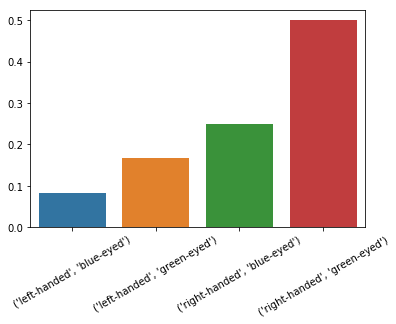

In [40]:
g = sns.barplot(np.arange(len(samplespace)), model.probdist())
g.set_xticklabels(samplespace, rotation=30);

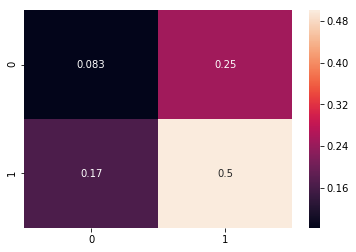

In [41]:
sns.heatmap(kangaroo_prob_matrix(x_opt), annot=True)